In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\akshay.nayak\Downloads\japan_data.csv")

In [3]:
label_encoder = LabelEncoder()
data['userid_e'] = label_encoder.fit_transform(data['userid'])
data['gameid_e'] = label_encoder.fit_transform(data['gameid'])

In [4]:
df = data.dropna()
df['dur_hr'] = df['dur_hr']/1000
df.rename(columns = {'dur_hr':'dur_sec'}, inplace = True)
df = df[(df['dur_sec'] <= 100000.00) & (df['plays'] <= 300)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112311 entries, 0 to 112319
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userid        112311 non-null  object 
 1   gameid        112311 non-null  object 
 2   process_date  112311 non-null  object 
 3   dur_sec       112311 non-null  float64
 4   sess          112311 non-null  int64  
 5   plays         112311 non-null  int64  
 6   userid_e      112311 non-null  int32  
 7   gameid_e      112311 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 6.9+ MB


C:\Users\akshay.nayak\AppData\Local\Temp\ipykernel_13748\765125513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dur_hr'] = df['dur_hr']/1000
C:\Users\akshay.nayak\AppData\Local\Temp\ipykernel_13748\765125513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'dur_hr':'dur_sec'}, inplace = True)


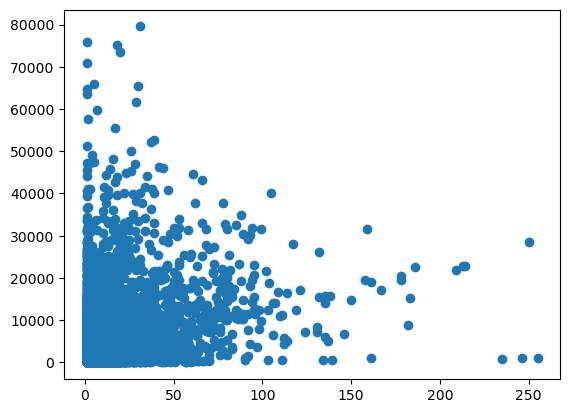

In [5]:
plt.scatter(df.plays,df.dur_sec) 

In [7]:
df['days_played'] = df.groupby(['userid', 'gameid'])['process_date'].transform('nunique')
df['total_duration'] = df.groupby(['userid', 'gameid'])['dur_sec'].transform('sum')
df['total_sessions'] = df.groupby(['userid', 'gameid'])['sess'].transform('sum')
df['gameplays'] = df.groupby(['userid', 'gameid'])['plays'].transform('sum')

df_1 = df[['userid_e', 'gameid_e', 'days_played', 'total_duration', 'total_sessions', 'gameplays']]

In [132]:
X = df_1[['total_duration', 'total_sessions', 'gameplays', 'days_played']]
X

,total_duration,total_sessions,gameplays,days_played
0,1670.313,17,19,5
1,14943.763,29,31,6
2,139167.363,146,431,26
3,165.771,4,5,3
4,2045.379,12,12,4
...,...,...,...,...
112315,1983.048,6,6,2
112316,803.424,3,3,3
112317,375.525,2,2,2
112318,32.306,2,2,1


In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\akshay.nayak\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay.nayak\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay.nayak\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay.nayak\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

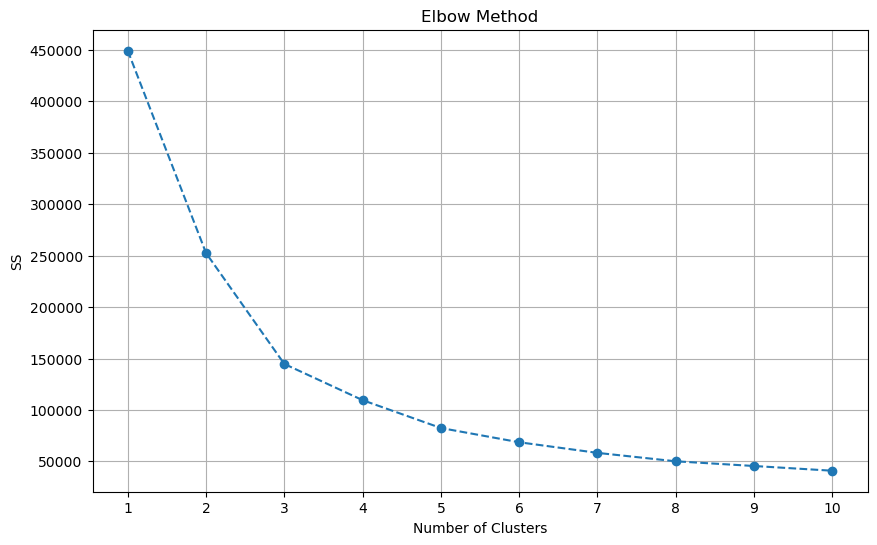

In [135]:
ss = []
max_clusters = 10  # Maximum number of clusters to consider
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    ss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [136]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Add cluster labels to your dataset
df_1['cluster'] = kmeans.labels_

C:\Users\akshay.nayak\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay.nayak\AppData\Local\Temp\ipykernel_13748\312994011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cluster'] = kmeans.labels_


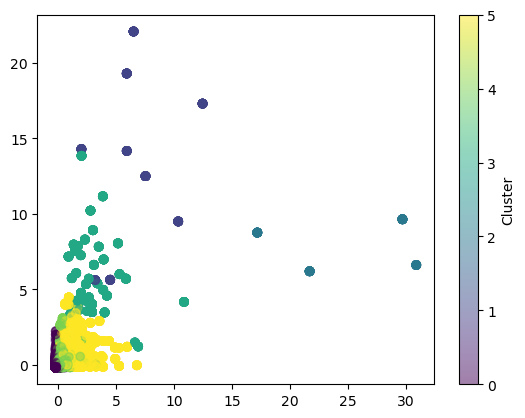

In [148]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 0], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')

In [138]:
df_1.head()

,userid_e,gameid_e,days_played,total_duration,total_sessions,gameplays,cluster
0,10465,90,5,1670.313,17,19,0
1,3032,102,6,14943.763,29,31,4
2,16821,85,26,139167.363,146,431,3
3,3133,47,3,165.771,4,5,0
4,10032,118,4,2045.379,12,12,0


In [139]:
def recommend_games(user_id, criteria='gameplays', top_n=5):
    user_cluster = df_1[df_1['userid_e'] == user_id]['cluster'].values[0]
    similar_users = df_1[df_1['cluster'] == user_cluster]['userid_e'].unique()
    similar_user_data = df_1[df_1['userid_e'].isin(similar_users)]
    mean_criteria_per_game = similar_user_data.groupby('gameid_e')[criteria].count().sort_values(ascending=False)
    recommended_games = mean_criteria_per_game.index[:top_n].tolist()
    mean_criteria = mean_criteria_per_game.values[:top_n]
    return recommended_games, mean_criteria

In [145]:
user_id = 1
criteria='gameplays'
top_n=10
recommended_games, mean_criteria = recommend_games(user_id, criteria, top_n)
print("Recommended games for user", user_id, ":", recommended_games)
print("Mean of criteria", criteria, ":", mean_criteria)

Recommended games for user 1 : [118, 53, 2, 122, 47, 64, 96, 149, 85, 48]
Mean of criteria gameplays : [6020 5189 5172 4887 4530 3966 3945 3161 2912 2862]


In [146]:
df_combined = pd.DataFrame({'Recommended Games': recommended_games, 'Mean of Criteria': mean_criteria})


df_combined

,Recommended Games,Mean of Criteria
0,118,6020
1,53,5189
2,2,5172
3,122,4887
4,47,4530
5,64,3966
6,96,3945
7,149,3161
8,85,2912
9,48,2862


In [147]:
df['cluster'] = kmeans.labels_
df

,userid,gameid,process_date,dur_sec,sess,plays,userid_e,gameid_e,days_played,total_duration,total_sessions,gameplays,cluster
0,88e814a1-6fc7-11ee-90e7-999399339d4f,9c80b060-6900-11ee-8ba3-310ca976d82c,2024-03-01,274.336,4,5,10465,90,5,1670.313,17,19,0
1,2722b2fb-f087-11ed-8905-2fde28c7284c,af719aa0-5914-11ee-a54b-1d97135d8ba9,2024-03-05,43.797,1,1,3032,102,6,14943.763,29,31,4
2,dbc23a2b-defb-11ed-8e49-7167443c5acc,95beb870-2536-11ee-8eae-d16eb4742af1,2024-03-06,19301.553,23,66,16821,85,26,139167.363,146,431,3
3,284eee85-ea53-11ed-ba86-77a891f816c8,557c0c10-2548-11ee-8eae-d16eb4742af1,2024-03-17,4.340,1,1,3133,47,3,165.771,4,5,0
4,833d2f46-e266-11ed-985a-b39b5f512e5f,c30b1420-253d-11ee-8eae-d16eb4742af1,2024-03-19,761.950,3,3,10032,118,4,2045.379,12,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112315,9664faaf-2267-11ee-992a-fb3951c633ac,cc9d35f0-2ba4-11ee-a9d6-6158dfaac7ef,2024-03-06,1448.845,2,2,11485,124,2,1983.048,6,6,0
112316,aa55621d-c218-11ee-a433-8fc4b73b9375,bdcf0d60-2626-11ee-a342-b14e527afd09,2024-03-14,515.179,1,1,12989,112,3,803.424,3,3,0
112317,fd92acd6-80e8-11ee-ac4c-e5c0fdf40acf,c30b1420-253d-11ee-8eae-d16eb4742af1,2024-03-11,22.078,1,1,19515,118,2,375.525,2,2,0
112318,8584804c-3d5d-11ee-820d-8f235901c9bc,0fbafae0-6901-11ee-8ba3-310ca976d82c,2024-03-03,32.306,2,2,10202,4,1,32.306,2,2,0


In [143]:
##df.to_csv(r"C:\Users\akshay.nayak\Downloads\japan_data_op.csv")

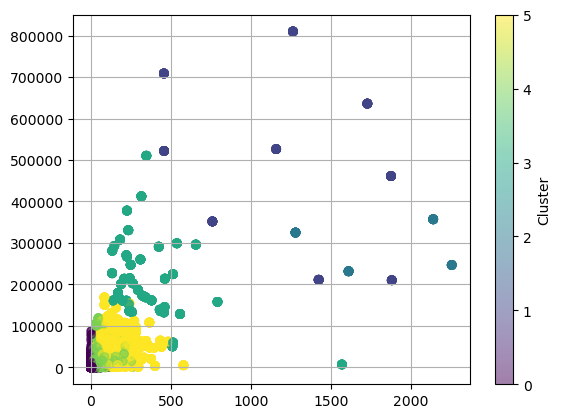

In [144]:
plt.scatter(df_1['gameplays'], df_1['total_duration'], c=df_1['cluster'], alpha=0.5)
plt.colorbar(label='Cluster')
plt.grid(True)